In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Collection and Processing

In [3]:
customer_df = pd.read_csv("Churn_Modelling.csv")

In [4]:
customer_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
customer_df.shape

(10000, 14)

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Split the target and Features
X = customer_df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
Y = customer_df['Exited']

In [8]:
print(X)
Y

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
# COnvert the categorical text coloumn into numerical(one hot encoding)
# Create the dummy variable for geogrphy and gender using get_dummies

geography = pd.get_dummies(X["Geography"], drop_first= True)
gender = pd.get_dummies(X["Gender"], drop_first=True)
print(geography)
print(gender)

      Germany  Spain
0       False  False
1       False   True
2       False  False
3       False  False
4       False   True
...       ...    ...
9995    False  False
9996    False  False
9997    False  False
9998     True  False
9999    False  False

[10000 rows x 2 columns]
       Male
0     False
1     False
2     False
3     False
4     False
...     ...
9995   True
9996   True
9997  False
9998   True
9999  False

[10000 rows x 1 columns]


In [11]:
# Concat the dummy columns with the X
X = pd.concat([X,geography, gender], axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,True,False,True


In [12]:
# Drop the original text categorical column
X = X.drop(['Geography', 'Gender'], axis = 1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [13]:
X.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Germany               bool
Spain                 bool
Male                  bool
dtype: object

## Model building

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [18]:
X.shape, X_train.shape, X_test.shape

((10000, 11), (8000, 11), (2000, 11))

### Data STandardization

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 0.16958176 -0.46460796  0.00666099 ... -0.5698444   1.74309049
  -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 ...  1.75486502 -0.57369368
   0.91601335]
 [-1.19119591 -0.94312892 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 ...
 [ 0.9015152  -0.36890377  0.00666099 ... -0.5698444  -0.57369368
   0.91601335]
 [-0.62420521 -0.08179119  1.39076231 ... -0.5698444   1.74309049
  -1.09168714]
 [-0.28401079  0.87525072 -1.37744033 ...  1.75486502 -0.57369368
  -1.09168714]]
[[-0.55204276 -0.36890377  1.04473698 ...  1.75486502 -0.57369368
  -1.09168714]
 [-1.31490297  0.10961719 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 [ 0.57162971  0.30102557  1.04473698 ... -0.5698444   1.74309049
  -1.09168714]
 ...
 [-0.74791227 -0.27319958 -1.37744033 ... -0.5698444   1.74309049
   0.91601335]
 [-0.00566991 -0.46460796 -0.33936434 ...  1.75486502 -0.57369368
   0.91601335]
 [-0.79945688 -0.84742473  1.04473698 ...  1.75486502 -0.57369368
   0.91601335]]


### ANN Model

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [22]:
# intitalize ANN
model = Sequential()

In [23]:
# Create input and 1st Hidden Layer
model.add(Dense(units = 6, kernel_initializer='he_uniform', activation= 'relu', input_dim =11))
# input_dim: Number of features in the input layer which is equal to the number of neorons in the input layer
# units: Number of neurons in the 1st hidden Layers
# kernel_intializer: define method used for weight initialization 


# 2nd hidden layer
model.add(Dense(units = 6, kernel_initializer='he_uniform', activation='relu'))

# Output Layer
model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Param for each layer is the total number of input plus the total number of output. 
- For the first hidden 
layer input is from 11 input neuron going to 6 neuron so the total input is 11*6 = 66 then 
- output is from 6 neuron. So the total param is 66+6 = 72
- Similary for second layer input is from 6 neuron going to 6 neuron in Dense network so total is 6*6 = 36 
and the ouput is coming from 6 neuron to the total param is 36+6 = 42
- FInally for the output layer input is coming from 6 neuron to 1 neuron so it will be 6*1 = 6 and 
output is coming from 1 neuron so the total param will be 6+1 = 7

In [24]:
# COmpiling the model
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
# Training the model with training data
model_history = model.fit(X_train, Y_train, validation_split=0.33, batch_size = 10, epochs =100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5143 - accuracy: 0.7962 - val_loss: 0.4916 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 0s 777us/step - loss: 0.4698 - accuracy: 0.7962 - val_loss: 0.4652 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 0s 768us/step - loss: 0.4505 - accuracy: 0.7962 - val_loss: 0.4499 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 0s 772us/step - loss: 0.4370 - accuracy: 0.7962 - val_loss: 0.4396 - val_accuracy: 0.7963
Epoch 5/100
536/536 [==============================] - 0s 782us/step - loss: 0.4272 - accuracy: 0.8065 - val_loss: 0.4306 - val_accuracy: 0.8058
Epoch 6/100
536/536 [==============================] - 0s 803us/step - loss: 0.4193 - accuracy: 0.8201 - val_loss: 0.4243 - val_accuracy: 0.8129
Epoch 7/100
536/536 [==============================] - 0s 767us/step - loss: 0.4138 - accuracy: 0.8296 - val_loss: 0.4199 - val_accu

536/536 [==============================] - 0s 765us/step - loss: 0.3298 - accuracy: 0.8638 - val_loss: 0.3535 - val_accuracy: 0.8580
Epoch 58/100
536/536 [==============================] - 0s 757us/step - loss: 0.3288 - accuracy: 0.8649 - val_loss: 0.3527 - val_accuracy: 0.8557
Epoch 59/100
536/536 [==============================] - 0s 755us/step - loss: 0.3299 - accuracy: 0.8619 - val_loss: 0.3518 - val_accuracy: 0.8584
Epoch 60/100
536/536 [==============================] - 0s 755us/step - loss: 0.3295 - accuracy: 0.8642 - val_loss: 0.3509 - val_accuracy: 0.8595
Epoch 61/100
536/536 [==============================] - 0s 773us/step - loss: 0.3293 - accuracy: 0.8632 - val_loss: 0.3520 - val_accuracy: 0.8565
Epoch 62/100
536/536 [==============================] - 0s 756us/step - loss: 0.3298 - accuracy: 0.8621 - val_loss: 0.3540 - val_accuracy: 0.8580
Epoch 63/100
536/536 [==============================] - 0s 753us/step - loss: 0.3292 - accuracy: 0.8647 - val_loss: 0.3544 - val_accuracy

In [27]:
# testing on test data 
model.evaluate(X_test,Y_test)

63/63 [==============================] - 0s 539us/step - loss: 0.3288 - accuracy: 0.8610


[0.32880154252052307, 0.8610000014305115]

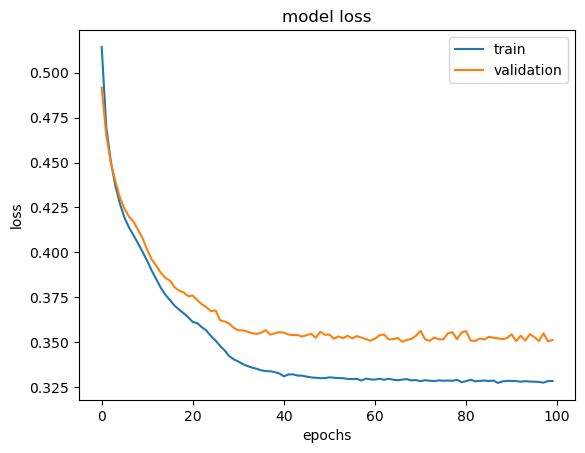

In [30]:
# ploting the model outcome for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("model loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])


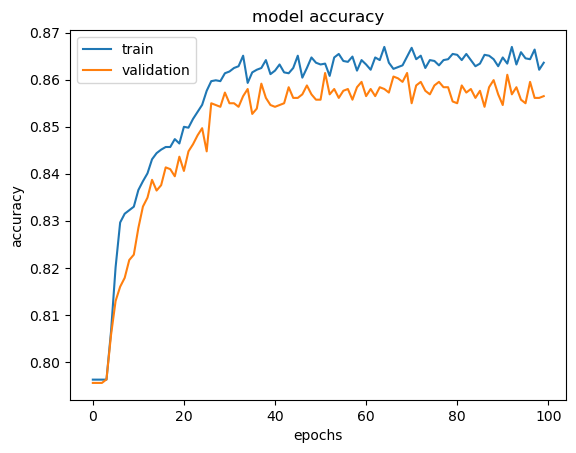

In [31]:
# ploting the model outcome for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])


In [33]:
# prediction for test data
Y_pred = model.predict(X_test)
Y_pred = Y_pred > 0.5
Y_pred

63/63 [==============================] - 0s 452us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

[[1518   77]
 [ 201  204]]


Text(50.722222222222214, 0.5, 'True Values')

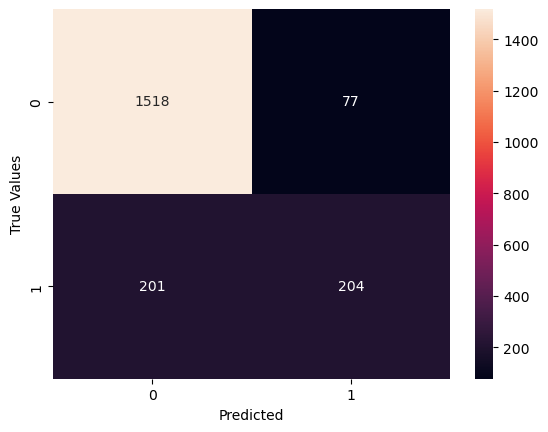

In [37]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix
model_cm = confusion_matrix(Y_test, Y_pred)
print(model_cm)

# Plot the confusion matrix
sns.heatmap(model_cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True Values')

In [39]:
# getting the accuracy score
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_pred, Y_test)
print("Accuracy score: ", score)

Accuracy score:  0.861


### Model with Dropout layer

In [40]:
model1 = Sequential()

In [42]:
# Create input and 1st Hidden Layer
model1.add(Dense(units = 6, kernel_initializer='he_uniform', activation= 'relu', input_dim =11))
model1.add(Dropout(0.3))
# input_dim: Number of features in the input layer which is equal to the number of neorons in the input layer
# units: Number of neurons in the 1st hidden Layers
# kernel_intializer: define method used for weight initialization 


# 2nd hidden layer
model1.add(Dense(units = 6, kernel_initializer='he_uniform', activation='relu'))
model1.add(Dropout(0.2))

# Output Layer
model1.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

# Model Summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [43]:
# COmpiling the model
model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
# Training the model with training data
model1_history = model1.fit(X_train, Y_train, validation_split=0.33, batch_size = 10, epochs =100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6155 - accuracy: 0.7597 - val_loss: 0.5147 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 0s 840us/step - loss: 0.5311 - accuracy: 0.7895 - val_loss: 0.4994 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 0s 848us/step - loss: 0.5152 - accuracy: 0.7942 - val_loss: 0.4930 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 0s 833us/step - loss: 0.4995 - accuracy: 0.7962 - val_loss: 0.4846 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 0s 826us/step - loss: 0.4968 - accuracy: 0.7949 - val_loss: 0.4795 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 0s 822us/step - loss: 0.4863 - accuracy: 0.7957 - val_loss: 0.4733 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 0s 816us/step - loss: 0.4822 - accuracy: 0.7960 - val_loss: 0.4700 - val_accu

536/536 [==============================] - 0s 826us/step - loss: 0.4156 - accuracy: 0.8196 - val_loss: 0.3853 - val_accuracy: 0.8145
Epoch 58/100
536/536 [==============================] - 0s 821us/step - loss: 0.4203 - accuracy: 0.8145 - val_loss: 0.3936 - val_accuracy: 0.8145
Epoch 59/100
536/536 [==============================] - 0s 819us/step - loss: 0.4273 - accuracy: 0.8106 - val_loss: 0.3917 - val_accuracy: 0.8160
Epoch 60/100
536/536 [==============================] - 0s 817us/step - loss: 0.4164 - accuracy: 0.8199 - val_loss: 0.3904 - val_accuracy: 0.8152
Epoch 61/100
536/536 [==============================] - 0s 819us/step - loss: 0.4181 - accuracy: 0.8106 - val_loss: 0.3906 - val_accuracy: 0.8164
Epoch 62/100
536/536 [==============================] - 0s 818us/step - loss: 0.4236 - accuracy: 0.8074 - val_loss: 0.3928 - val_accuracy: 0.8133
Epoch 63/100
536/536 [==============================] - 0s 818us/step - loss: 0.4177 - accuracy: 0.8117 - val_loss: 0.3922 - val_accuracy

In [45]:
# prediction for test data
Y_pred1 = model1.predict(X_test)
Y_pred1 = Y_pred1 > 0.5
Y_pred1

63/63 [==============================] - 0s 568us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

[[1588    7]
 [ 349   56]]


Text(50.722222222222214, 0.5, 'True Values')

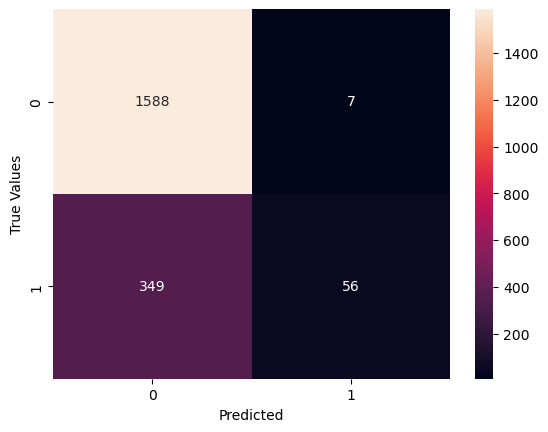

In [46]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix
model_cm1 = confusion_matrix(Y_test, Y_pred1)
print(model_cm1)

# Plot the confusion matrix
sns.heatmap(model_cm1, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True Values')